In [25]:
import yfinance as yf
import pandas as pd
import numpy as np
#setup
#code
name = 'AAPL'
ticker = yf.Ticker(name) #import data
aapl_df = ticker.history(period="5y") #get data from 5 year period in dataframe
aapl_df.drop(['High','Close','Volume','Dividends','Stock Splits'], axis=1, inplace=True) #only have two columns, not seven
open = np.empty(shape = (1259), dtype = float)
close = np.empty(shape = (1259), dtype = float)

open=aapl_df[['Open']].to_numpy()

#when training ml model you have a set of steps, and you have to specify those steps

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
import sklearn

#**STEPS**
1. Get a dataset
2. Clean the data
3. Split the dataset (into train, test, validation) train the dataset on the training dataset, validate it and test it on the testing dataset to see how well the model handles unseen data (or else, the model will overfit to the training data)
4. Choose your model (which models you will use: like linear regression, random forests, decision trees, neural networks) how to combine and explain the models (about the parameters and the evaluation of this part)
5. Use MAE/MSE to evaluate models (MAE is mean absolute error, mean of the absolute values of the differences between predicted and actual. MSE is mean square error, the mean of the squared deviations from your predicted value and the actual value)

In [27]:
aapl_df.head()

,Open,Low
Date,,
2020-07-30 00:00:00-04:00,91.556763,91.148496
2020-07-31 00:00:00-04:00,100.011350,98.008882
2020-08-03 00:00:00-04:00,105.177879,104.878973
2020-08-04 00:00:00-04:00,106.084316,105.360122
2020-08-05 00:00:00-04:00,106.322493,105.855896


In [28]:
#opening prices for each day over the past 5 years
open

array([[ 91.5567632 ],
       [100.01134992],
       [105.17787906],
       ...,
       [214.02999878],
       [214.17999268],
       [211.89500427]], shape=(1256, 1))

In [29]:
X = np.zeros((1260,3))
Y = [0]*1260
#sliding window with a fixed window of 3 days, x is the 3 days, y is the next day outside the window (our prediction)
for i in range(1250):
  X[i] = [open[i][0],open[i+1][0],open[i+2][0]]
  Y[i] = open[i+3][0]

#gives you 3 consecutive days as input and the next day as output
print(X[0], Y[0])

[ 91.5567632  100.01134992 105.17787906] 106.08431605909598


In [30]:
#next step: check for empty values/discrepancies in the dataset
#then split dataset
from sklearn import linear_model

#shuffle so that we won't be biased and we want the general pattern of the last 5 years
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42, shuffle = False) #no shuffling

In [31]:
lin_regr = linear_model.LinearRegression()
#.fit trains model
lin_regr.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [32]:
lin_regr.coef_
#weights * day 1 + weights*day 2 + weights*day 3 = prediction

array([ 0.03820359, -0.00586862,  0.96212931])

Linear Regression

In [33]:
Y_predTrain_linear = lin_regr.predict(X_train)
mse_linear_train = mean_squared_error(y_train, Y_predTrain_linear)
print(f"MSE of Linear Reg (Train): {mse_linear_train}")

Y_pred_linear = lin_regr.predict(X_test)
mse_linear_test = mean_squared_error(y_test, Y_pred_linear)
print(f"MSE of Linear Reg (test): {mse_linear_test}")

MSE of Linear Reg (Train): 8.189818488264192
MSE of Linear Reg (test): 18.569333343404868


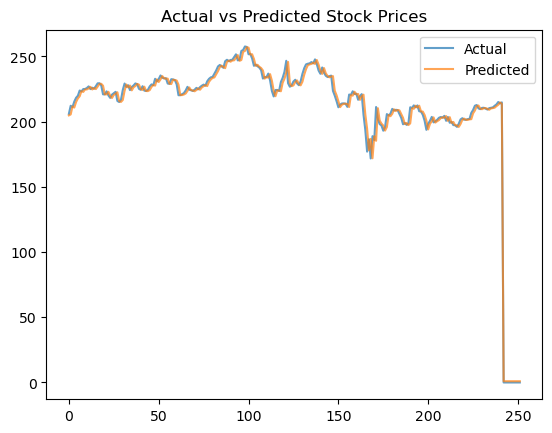

In [34]:
import matplotlib.pyplot as plt
plt.plot(y_test, label="Actual", alpha=0.7)
plt.plot(Y_pred_linear, label="Predicted", alpha=0.7)
plt.legend()
plt.title("Actual vs Predicted Stock Prices")
plt.show()

Using DecisionTree

In [35]:
dec_tree = DecisionTreeRegressor(random_state = 0)
dec_tree.fit(X_train, y_train)

Y_pred_tree = dec_tree.predict(X_test)
mse_tree_test = mean_squared_error(Y_pred_tree, y_test)

#Y_predTrain_tree = dec_tree.predict(X_test)
#mse_tree_train = mean_squared_error(Y_predTrain_tree, y_train)

#print(f"MSE of Decision Tree (train): {mse_tree_train}")
print(f"MSE of Decision Tree (test): {mse_tree_test}")

MSE of Decision Tree (test): 513.5782623702836


Random Forest and MLP Regressor

In [43]:
forest = RandomForestRegressor(n_estimators = 100, random_state = 0, n_jobs = 1)
forest.fit(X_train, y_train)

mlp = MLPRegressor(random_state=42, max_iter=3000).fit(X_train, y_train)

In [44]:
#random forest predictions on training data
Y_predTrain_forest = forest.predict(X_train)
mse_forest_train = mean_squared_error(y_train, Y_predTrain_forest)

#random forest predictions on test data
Y_pred_forest = forest.predict(X_test)
mse_forest_test = mean_squared_error(y_test, Y_pred_forest)

print(f"MSE of Random Forest (train): {mse_forest_train}")
print(f"MSE of Random Forest (test): {mse_forest_test}") #why is this so high? See if standard scaler has any use here

MSE of Random Forest (train): 1.422920268002164
MSE of Random Forest (test): 511.0235810859017


In [45]:
#MLP predictions on training data
Y_predTrain_mlp = mlp.predict(X_train)
mse_mlp_train = mean_squared_error(y_train, Y_predTrain_mlp)

#MLP predictions on testing data
Y_pred_mlp = mlp.predict(X_test)
mse_mlp_test = mean_squared_error(y_test, Y_pred_mlp)

print(f"MSE of MLP Regressor (train): {mse_mlp_train}")
print(f"MSE of MLP Regressor (test): {mse_mlp_test}")

MSE of MLP Regressor (train): 11.445636568633155
MSE of MLP Regressor (test): 27.909469401982715


K-Nearest Neighbors

In [39]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train, y_train)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [40]:
#Training accuracy
Y_predTrain_knn = knn.predict(X_train)
mse_knn_train = mean_squared_error(y_train, Y_predTrain_knn)
print(f"MSE of KNN (train): {mse_knn_train}")

#test accuracy
Y_pred_knn = knn.predict(X_test)
mse_knn_test = mean_squared_error(y_test, Y_pred_knn)
print(f"MSE Test Accuracy: {mse_knn_test}")

MSE of KNN (train): 5.531234128022633
MSE Test Accuracy: 525.8832051986515


Lasso & Ridge Models

In [41]:
from sklearn.linear_model import Lasso
lasso_model = sklearn.linear_model.Lasso(alpha=0.1, random_state=0)
lasso_model.fit(X_train, y_train)
y_pred_lasso_train = lasso_model.predict(X_train)
y_pred_lasso_test = lasso_model.predict(X_test)
print(f"Training MSE: {mean_squared_error(y_train, y_pred_lasso_train)}")
print(f"Testing MSE: {mean_squared_error(y_test, y_pred_lasso_test)}")

Training MSE: 8.189986878833803
Testing MSE: 18.53934596999946


In [42]:
from sklearn.linear_model import Ridge
ridge_model = sklearn.linear_model.Ridge(alpha=1.0, random_state=0)
ridge_model.fit(X_train, y_train)
y_pred_ridge_train = ridge_model.predict(X_train)
y_pred_ridge_test = ridge_model.predict(X_test)
print(f"Training MSE: {mean_squared_error(y_train, y_pred_ridge_train)}")
print(f"Testing MSE: {mean_squared_error(y_test, y_pred_ridge_test)}")

Training MSE: 8.189818600916372
Testing MSE: 18.56918625937484


Defining simple function for simulating:

In [19]:
#using best model (linear model) to predict and simulate buying and selling
def simpleSimulateBuySell(predictions, amount, interval, stocks, days):
  for i in range(days):
    if (predictions[i+1] < Y[i] and stocks > 0):
      stocks -= interval
      amount += Y[i] * interval
    elif (predictions[i + 1] > Y[i] and amount > Y[i]):
      stocks += interval
      amount -= Y[i] * interval

  amount += Y[i] * stocks
  print(f"Investing in {name}, Final Amount: ${str(amount.round(2))}")

#def realisticSimulateBuySell():

In [20]:
predictions = lin_regr.predict(X) #using linear model in this case
amount = 50000
stocks = 0

simpleSimulateBuySell(predictions, amount, 3, stocks, 1200)

import math
print(f"If we had just held the {name} stock from the beginning to the end, we would have made ${str((math.floor(50000/Y[0]) * Y[1200] - Y[0]).round(2))}.")

Investing in MSFT, Final Amount: $111897.36
If we had just held the MSFT stock from the beginning to the end, we would have made $108493.27.


Simulating with all 7 models:

In [24]:
for predictor in [lin_regr, forest, mlp, knn, dec_tree, ridge_model, lasso_model]:
    predictions = predictor.predict(X)
    amount = initial = 50000
    stocks = 0
    #If price is lower, buy

    for i in range(1200):
        if (predictions[i+1] < Y[i] and stocks>0):
            stocks -= 1
            amount += Y[i]
        elif (predictions[i + 1] > Y[i] and amount > Y[i]):
            stocks += 1
            amount -= Y[i]
    amount += Y[i] * stocks
    stocks = 0
    print(predictor, amount, '\n')
    #print(amount, stocks)

LinearRegression() 95232.2467179754 

RandomForestRegressor(random_state=0) 67347.19979450187 

MLPRegressor(max_iter=500, random_state=1) 51821.15013914671 

KNeighborsRegressor(n_neighbors=3) 63250.5670275776 

DecisionTreeRegressor(random_state=0) 58953.700595056216 

Ridge(random_state=0) 95232.2467179754 

Lasso(alpha=0.1, random_state=0) 94937.3928017654 



### Training vs. Test vs. Validation

- Validation set is important because you want to separate testing for the model and for post-training.
- We use validation set (unseen data) to define base parameters & hyperparameter tuning
- With validation, your model will be less susceptible to overfitting (biased estimate of real world performance of the model)

**validation set simulates the testing set**

In [ ]:
#If today is 10% higher, be more aggressive
def test_stock_market(stocks_to_buy=30, initial=50000):
    max_amt = 0
    for predictor in [lin_regr, forest, mlp, knn, dec_tree]:
        predictions = predictor.predict(X)
        amount = initial
        stocks = 0

        for i in range(1200):
            if (predictions[i+1] < Y[i] and stocks>0):
                amt = min(stocks, stocks_to_buy)
                stocks -= amt
                amount += amt*Y[i]
            elif (predictions[i + 1] > Y[i] and amount > Y[i]):
                amt_to_buy = min(amount//Y[i], stocks_to_buy)
                stocks += amt_to_buy
                amount -= amt_to_buy*Y[i]
        amount += Y[1200] * stocks
        stocks = 0
        max_amt = max(amount, max_amt)
    return max_amt
A = 0
#running tests (monte carlo simulation)
for i in range(0, 32):
    A = max(A, test_stock_market(i**2))
A

np.float64(2724831.505718268)

In [ ]:
import random
#Should be outperforming the baselines
def baseline_p(p=0.5):
    amount = 50000
    stocks = 0
    for i in range(1200):
        R = random.random()
        if R < p:
            buy=True
        else:
            buy = False
        if stocks==0:
            buy=True
        if amount < Y[i]:
            buy=False
        if buy:
            stocks += 1
            amount -= Y[i]
        else:
            stocks -= 1
            amount += Y[i]
    amount += Y[i] * stocks
    stocks = 0
    return amount

def test_stock_market(stocks_to_buy=30, initial=50000):
    '''Testing Comments'''
    max_amt = 0
    for predictor in [lin_regr, forest, mlp, knn, dec_tree]:
        predictions = predictor.predict(X)
        amount = initial
        stocks = 0

        for i in range(1200):
            if (predictions[i+1] < Y[i] and stocks>0):
                amt = min(stocks, stocks_to_buy)
                stocks -= amt
                amount += amt*Y[i]
            elif (predictions[i + 1] > Y[i] and amount > Y[i]):
                amt_to_buy = min(amount//Y[i], stocks_to_buy)
                stocks += amt_to_buy
                amount -= amt_to_buy*Y[i]
        amount += Y[i] * stocks
        stocks = 0
        max_amt = max(amount, max_amt)
    return max_amt

In [102]:
print("DISCLAIMER: To model the stock market and its randomness, the baseline will vary.")
print(f"Baseline: ${baseline_p().round(2)}")

DISCLAIMER: To model the stock market and its randomness, the baseline will vary.
Baseline: $51383.65


In [101]:
print(f"Best outcome: ${test_stock_market().round(2)}")

Best outcome: $204862.98


(1260, 3)


<ErrorbarContainer object of 3 artists>

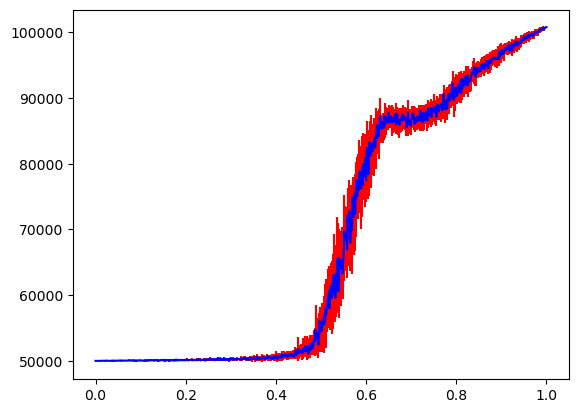

In [103]:
Z = 1001
p = np.linspace(0, 1, Z)
print(X.shape)
T = 9
money_made = np.zeros((Z, T))

for i,x in enumerate(p):
    for j in range(T):
        money_made[i][j] = baseline_p(x)
plt.errorbar(p, np.mean(money_made, axis=1), yerr=np.std(money_made, axis=1), ecolor='red', color='blue')

_________________________________________________________________________________

You can build a system that will buy more if the prediction is much higher than today

And buy/sell more aggressively if there is a gap

do something with returns

### Hidden layers:
Layers between input and output,

Encoder and decoder - find numerical representation of this

attention: input is large, when you provide text or picture, attention pulls only the important information (and not excess information that is not required/needed).

attention mechanism focuses on important parts of the data.

### positional embedding

The order matters a lot (especially in time series or NLP tasks)

forces the model to remember when the prices

## How to find correlation 

### 1. Run the linear model and check the coefficients updates (gradient descent)
### 2. use correlation matrix

### 3. Find last 3 opening prices of two stocks to find correlation? 

Apply regression to 2 stocks

Regression models influence, while correlation measures association.

Positive -> if google goes up, Apple goes up as well (coefficient of Google tells you how correlated google is to apple)
Negative -> negatively correlated
Closer to 0 -> less correlation

Units are always between -1 and +1 (for correlation)

- Regression models influence (prediction) while correlation measures co-movement — and that regression coefficients aren’t bounded between −1 and +1 like correlations

To test the importance of features, just manually remove & filter and check which one has the highest impact on the prediction?